# Web Scraping using Beautiful Soup

https://www.datacamp.com/community/tutorials/web-scraping-using-python?utm_source=mybridge


    Meu Primeiro contato com scraping, pandas, numpy, matplotlib e seaborn. *_*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

In [4]:
soup = BeautifulSoup(html, 'lxml')# Tem que instalar o lxml
type(soup)

bs4.BeautifulSoup

In [5]:
# Get the title
title = soup.title
print(title)

<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>


In [6]:
text = soup.get_text()
print(text)








2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results






        @media print {
            .noprint {
                display: none;
            }

            .dataTables_filter {
                display: none;
            }
        }
        #individualResults tbody tr {
            cursor: pointer;
        }
        .video-container {
            position: relative;
            padding-bottom: 56.25%; /* 16:9 */
            padding-top: 25px;
            height: 0;
        }
        .video-container iframe {
            position: absolute;
            top: 0;
            left: 0;
            width: 100%;
            height: 100%;
        }
        .dataTables_wrapper .dataTables_paginate {
            float: right;
            text-align: right;
            padding-top: 0.25em;
        }
        .dataTables_wrapper .dataTables_paginate .paginate_button {
                box-sizing: border-box;
                display: inline-block;
                min-width: 

In [7]:
soup.find_all('a')

[<a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px">5K</a>,
 <a href="http://hubertiming.com/">Huber Timing Home</a>,
 <a href="#individual">Individual Results</a>,
 <a href="#team">Team Results</a>,
 <a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="#tabs-1" style="font-size: 18px">Results</a>,
 <a name="individual"></a>,
 <a name="team"></a>,
 <a href="http://www.hubertiming.com/"><img height="65" src="/sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber Timing</a>,
 <a href="http://facebook.com/hubertiming/"><img src="/results/FB-f-Logo__blue_50.png"/></a>]

In [8]:
all_links = soup.find_all('a')
for link in all_links:
    print(link.get("href"))

/results/2017GPTR
http://hubertiming.com/
#individual
#team
mailto:timing@hubertiming.com
#tabs-1
None
None
http://www.hubertiming.com/
http://facebook.com/hubertiming/


In [9]:
rows = soup.find_all('tr')
print(rows[:10])

[<tr><td>Finishers:</td><td>577</td></tr>, <tr><td>Male:</td><td>414</td></tr>, <tr><td>Female:</td><td>163</td></tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr>
<td>1</td>
<td>814</td>
<td>JARED WILSON</td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>00:36:21</td>
<td>05:51</td>
<td>1 of 414</td>
<td>M 36-45</td>
<td>1 of 152</td>
<td>00:00:03</td>
<td>00:36:24</td>
<td></td>
</tr>, <tr>
<td>2</td>
<td>573</td>
<td>NATHAN A SUSTERSIC</td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>00:36:42</td>
<td>05:55</td>
<td>2 of 414</td>
<td>M 26-35</td>
<td>1 of 154</td>
<td>00:00:03</td>
<td>00:36:45</td>
<td>INTEL TEAM F</td>
</tr>, <tr>
<td>3</td>
<td>687</td>
<td>FRANCISCO MAYA</td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>00:37:44</td>
<td>06:05</td>
<td

In [10]:
list_rows = []
for row in rows:
    row_td = row.find_all('td') # Pegando a ultima linha 
    list_rows.append(row.find_all('td'))
print(row_td)
type(row_td)
print(list_rows)


[<td>14TH</td>, <td>INTEL TEAM M</td>, <td>04:43:23</td>, <td>00:58:59 - DANIELLE CASILLAS</td>, <td>01:02:06 - RAMYA MERUVA</td>, <td>01:17:06 - PALLAVI J SHINDE</td>, <td>01:25:11 - NALINI MURARI</td>]
[[<td>Finishers:</td>, <td>577</td>], [<td>Male:</td>, <td>414</td>], [<td>Female:</td>, <td>163</td>], [], [<td>1</td>, <td>814</td>, <td>JARED WILSON</td>, <td>M</td>, <td>TIGARD</td>, <td>OR</td>, <td>00:36:21</td>, <td>05:51</td>, <td>1 of 414</td>, <td>M 36-45</td>, <td>1 of 152</td>, <td>00:00:03</td>, <td>00:36:24</td>, <td></td>], [<td>2</td>, <td>573</td>, <td>NATHAN A SUSTERSIC</td>, <td>M</td>, <td>PORTLAND</td>, <td>OR</td>, <td>00:36:42</td>, <td>05:55</td>, <td>2 of 414</td>, <td>M 26-35</td>, <td>1 of 154</td>, <td>00:00:03</td>, <td>00:36:45</td>, <td>INTEL TEAM F</td>], [<td>3</td>, <td>687</td>, <td>FRANCISCO MAYA</td>, <td>M</td>, <td>PORTLAND</td>, <td>OR</td>, <td>00:37:44</td>, <td>06:05</td>, <td>3 of 414</td>, <td>M 46-55</td>, <td>1 of 64</td>, <td>00:00:04</td

In [11]:
# Limpando as tags html
str_cells = str(list_rows)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)


[[Finishers:, 577], [Male:, 414], [Female:, 163], [], [1, 814, JARED WILSON, M, TIGARD, OR, 00:36:21, 05:51, 1 of 414, M 36-45, 1 of 152, 00:00:03, 00:36:24, ], [2, 573, NATHAN A SUSTERSIC, M, PORTLAND, OR, 00:36:42, 05:55, 2 of 414, M 26-35, 1 of 154, 00:00:03, 00:36:45, INTEL TEAM F], [3, 687, FRANCISCO MAYA, M, PORTLAND, OR, 00:37:44, 06:05, 3 of 414, M 46-55, 1 of 64, 00:00:04, 00:37:48, ], [4, 623, PAUL MORROW, M, BEAVERTON, OR, 00:38:34, 06:13, 4 of 414, M 36-45, 2 of 152, 00:00:03, 00:38:37, ], [5, 569, DEREK G OSBORNE, M, HILLSBORO, OR, 00:39:21, 06:20, 5 of 414, M 26-35, 2 of 154, 00:00:03, 00:39:24, INTEL TEAM F], [6, 642, JONATHON TRAN, M, PORTLAND, OR, 00:39:49, 06:25, 6 of 414, M 18-25, 1 of 34, 00:00:06, 00:39:55, ], [7, 144, GEORGE TOTONCHY, M, PORTLAND, OR, 00:40:04, 06:27, 7 of 414, M 36-45, 3 of 152, 00:00:13, 00:40:17, ], [8, 395, BENJAMIN C CHAFFIN, M, PORTLAND, OR, 00:40:05, 06:27, 8 of 414, M 36-45, 4 of 152, 00:00:04, 00:40:09, ], [9, 7, BRANDON THOMAS, M, , , 00

In [12]:
import re

In [13]:
list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '', str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[14TH, INTEL TEAM M, 04:43:23, 00:58:59 - DANIELLE CASILLAS, 01:02:06 - RAMYA MERUVA, 01:17:06 - PALLAVI J SHINDE, 01:25:11 - NALINI MURARI]


str

In [14]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,"[Finishers:, 577]"
1,"[Male:, 414]"
2,"[Female:, 163]"
3,[]
4,"[1, 814, JARED WILSON, M, TIGARD, OR, 00:36:21..."
5,"[2, 573, NATHAN A SUSTERSIC, M, PORTLAND, OR, ..."
6,"[3, 687, FRANCISCO MAYA, M, PORTLAND, OR, 00:3..."
7,"[4, 623, PAUL MORROW, M, BEAVERTON, OR, 00:38:..."
8,"[5, 569, DEREK G OSBORNE, M, HILLSBORO, OR, 00..."
9,"[6, 642, JONATHON TRAN, M, PORTLAND, OR, 00:39..."


### Data Manipulation and Cleaning


In [15]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,[],None,None,None,None,None,None,None,None,None,None,None,None,None
4,[1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,[3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,[4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]
9,[6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,]


In [16]:
df1[0] = df1[0].str.strip('[')
# df1[0] = df1[1].str.strip(']')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]
9,6,642,JONATHON TRAN,M,PORTLAND,OR,00:39:49,06:25,6 of 414,M 18-25,1 of 34,00:00:06,00:39:55,]


In [17]:
col_labels =  soup.find_all('th')
col_labels 

[<th>Place</th>,
 <th>Bib</th>,
 <th>Name</th>,
 <th>Gender</th>,
 <th>City</th>,
 <th>State</th>,
 <th>Chip Time</th>,
 <th>Chip Pace</th>,
 <th>Gender Place</th>,
 <th>Age Group</th>,
 <th>Age Group Place</th>,
 <th>Time to Start</th>,
 <th>Gun Time</th>,
 <th>Team</th>]

In [18]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()

cleantext2


'[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]'

In [19]:
print(type(cleantext2))

<class 'str'>


In [20]:
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]']


In [21]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [22]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]


In [23]:
frames = [df3, df1]

frames

[       0     1      2        3      4       5           6           7   \
 0  [Place   Bib   Name   Gender   City   State   Chip Time   Chip Pace   
 
               8           9                 10              11         12  \
 0   Gender Place   Age Group   Age Group Place   Time to Start   Gun Time   
 
        13  
 0   Team]  ,              0                 1                         2   \
 0    Finishers:              577]                      None   
 1         Male:              414]                      None   
 2       Female:              163]                      None   
 3             ]              None                      None   
 4             1               814              JARED WILSON   
 5             2               573        NATHAN A SUSTERSIC   
 6             3               687            FRANCISCO MAYA   
 7             4               623               PAUL MORROW   
 8             5               569           DEREK G OSBORNE   
 9             6        

In [24]:
df4 = pd.concat(frames)

df4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]


In [25]:
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]


In [26]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head(10)

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]


In [27]:
df5.info()
print()
print(df5.shape)
print()
print('a tabela tem 597 linhas e 14 colunas')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 595
Data columns (total 14 columns):
[Place              597 non-null object
 Bib                596 non-null object
 Name               593 non-null object
 Gender             593 non-null object
 City               593 non-null object
 State              593 non-null object
 Chip Time          593 non-null object
 Chip Pace          578 non-null object
 Gender Place       578 non-null object
 Age Group          578 non-null object
 Age Group Place    578 non-null object
 Time to Start      578 non-null object
 Gun Time           578 non-null object
 Team]              578 non-null object
dtypes: object(14)
memory usage: 70.0+ KB

(597, 14)

a tabela tem 597 linhas e 14 colunas


In [28]:
print('dropando totas as linhas')

df6 = df5.dropna(axis=0, how='any')

dropando totas as linhas


In [29]:
df6.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]


In [30]:
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]


In [31]:
df7.rename(columns={'[Place': 'Place'}, inplace=True)
df7.rename(columns={' Team]': 'Team'}, inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]


In [32]:
df7['Team'] = df7['Team'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F


### Data Analysis and Visualization

In [33]:
time_list = df7[' Chip Time'].tolist()
time_list[:10]

[' 00:36:21',
 ' 00:36:42',
 ' 00:37:44',
 ' 00:38:34',
 ' 00:39:21',
 ' 00:39:49',
 ' 00:40:04',
 ' 00:40:05',
 ' 00:40:17',
 ' 00:40:21']

In [34]:
time_mins = []
for i in time_list:
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)


In [35]:
df7['Runner_mins'] = time_mins # Adiciona uma nova coluna com valores em minutos.
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner_mins
4,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,,36.350000
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F,36.700000
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,,37.733333
7,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,,38.566667
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F,39.350000


In [36]:
df7.describe(include=[np.number]) # C A R A M B A . . . > .O_O.

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


In [37]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

([<matplotlib.axis.XTick at 0x7fb47c874898>],
 <a list of 1 Text xticklabel objects>)

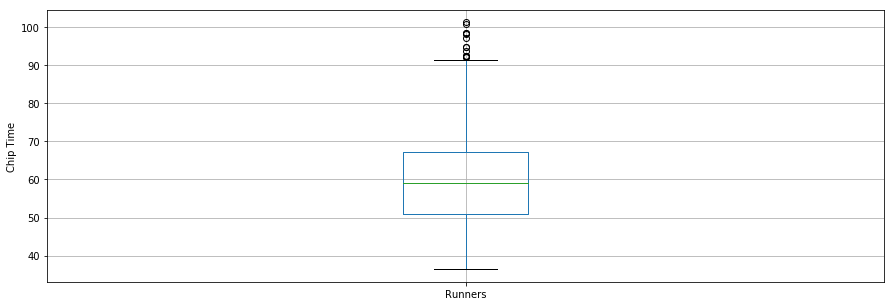

In [38]:
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

<function matplotlib.pyplot.show(*args, **kw)>

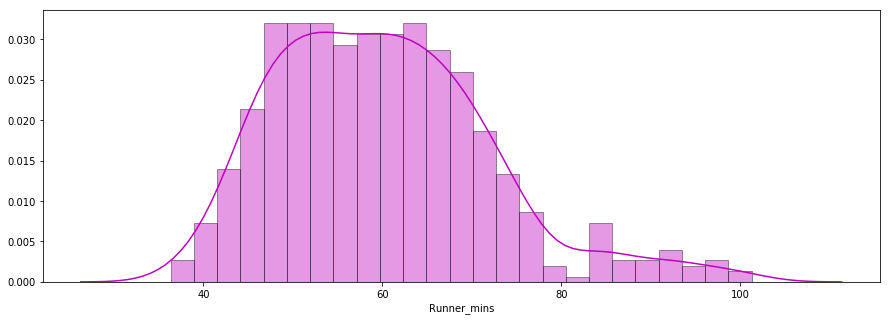

In [39]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

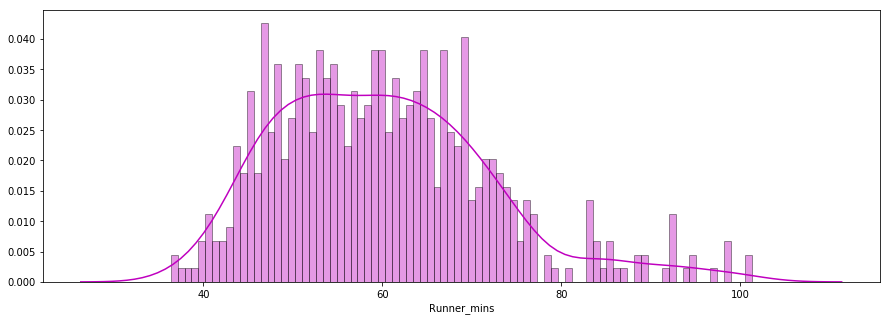

In [40]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False,  color='m', bins=84, hist_kws={'edgecolor':'black'})
plt.show

/home/carlos/workspace/park/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


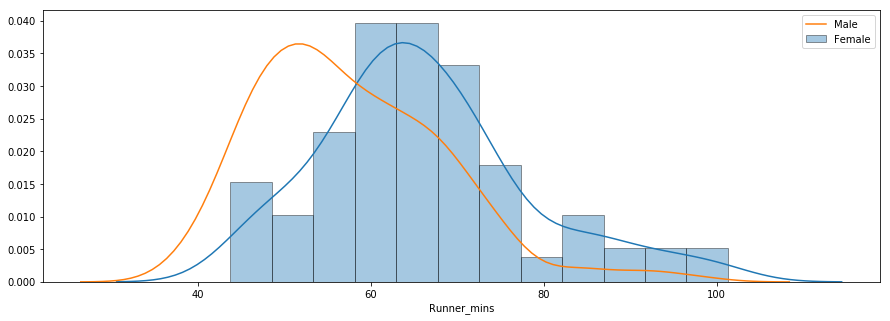

In [41]:
f_fuko = df7.loc[df7[' Gender'] == ' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender'] == ' M']['Runner_mins']

sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

/home/carlos/workspace/park/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


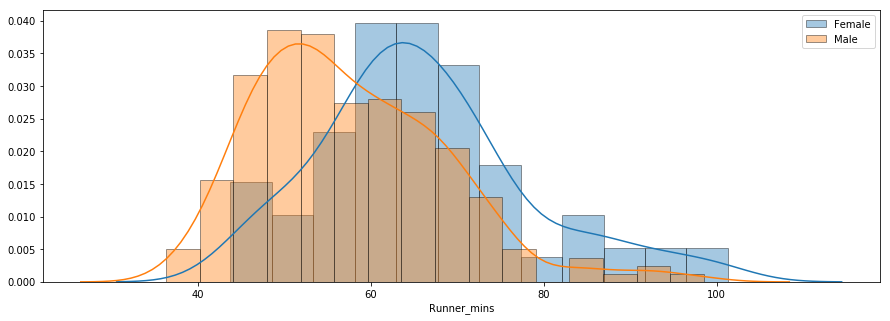

In [42]:
f_fuko = df7.loc[df7[' Gender'] == ' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender'] == ' M']['Runner_mins']

sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [43]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
 F            163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M            414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667  


Text(0.5,0.98,'')

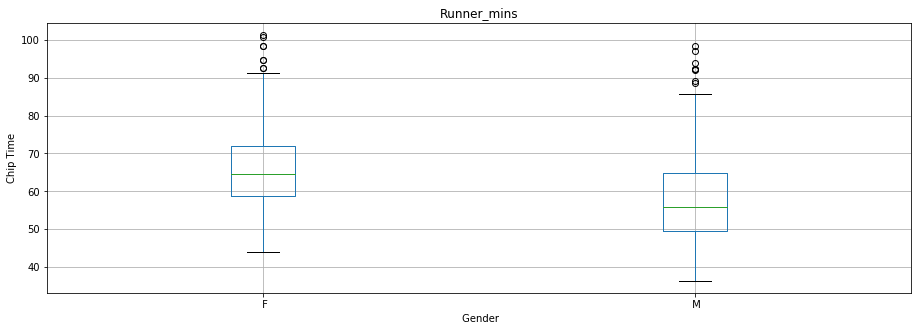

In [44]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")